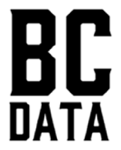

# Black Cat Data - Data Science and AI
## Lab 4.3: Measurements

INSTRUCTIONS:

- Run the cells
- Observe and understand the results
- Answer the questions

In [1]:
## Import Libraries

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
boston_house_data = datasets.load_boston()

In [3]:
X = pd.DataFrame(boston_house_data.data, columns = boston_house_data.feature_names)
y = boston_house_data.target

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [4]:
## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24.0,666.0,20.2,383.32,13.11
241,0.10612,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6.0,300.0,16.6,394.62,12.40
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77


In [6]:
## Use Forward Feature Selection to pick a good model

# start with no input variables
included = []
r2_list = []
adjusted_r2_list = []
model = LinearRegression()
n = X_test.shape[0]

for _ in range(X.shape[1]):
    # keep track of model and parameters
    best = ('', 0, 0)
    # list the input variables to be evaluated
    excluded = list(set(X.columns) - set(included))
    # for each remaining feature to be evaluated
    for new_column in excluded:
        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        # number of features in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        # if model improves
        if adjusted_r2 > best[2]:
            # record new parameters
            best = (new_column, r2, adjusted_r2)
    # END for new_column in excluded

    r2_list.append(best[1])
    adjusted_r2_list.append(best[2])

    included.append(best[0])
    excluded = list(set(excluded) - set(best[0]))
    print('Add %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % (best))

print('')
print('Resulting features:')
print(', '.join(included))

Add LSTAT with R^2 = 0.577 and adjusted R^2 = 0.573
Add RM   with R^2 = 0.673 and adjusted R^2 = 0.666
Add PTRATIO with R^2 = 0.704 and adjusted R^2 = 0.695
Add DIS  with R^2 = 0.716 and adjusted R^2 = 0.704
Add NOX  with R^2 = 0.730 and adjusted R^2 = 0.716
Add CHAS with R^2 = 0.738 and adjusted R^2 = 0.721
Add B    with R^2 = 0.743 and adjusted R^2 = 0.724
Add ZN   with R^2 = 0.746 and adjusted R^2 = 0.724
Add RAD  with R^2 = 0.747 and adjusted R^2 = 0.723
Add TAX  with R^2 = 0.753 and adjusted R^2 = 0.726
Add CRIM with R^2 = 0.756 and adjusted R^2 = 0.726
Add INDUS with R^2 = 0.756 and adjusted R^2 = 0.723
Add AGE  with R^2 = 0.756 and adjusted R^2 = 0.720

Resulting features:
LSTAT, RM, PTRATIO, DIS, NOX, CHAS, B, ZN, RAD, TAX, CRIM, INDUS, AGE


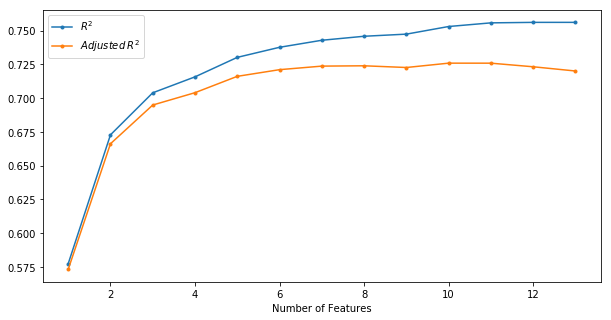

In [8]:
## Chart both R^2 and Adjusted R^2

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(range(1, 14), r2_list, label = '$R^2$', marker = '.')
plt.plot(range(1, 14), adjusted_r2_list, label = '$Adjusted \: R^2$', marker = '.')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()

### QUESTION: What can you comment on the results presented in the graphic?

# I think that the optimal number of features would be around 9 or 10 since the Adjusted R2 started decreasing after 10 features